In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('./../data/sierraleone-bumbuna.csv')

In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [5]:
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [4]:
import importlib
import src.util
importlib.reload(src.util)
from src.util import main_cleaning_pipeline
irr_cols = ['GHI', 'DNI', 'DHI']
main_cleaning_pipeline(irr_cols , df)

1. Reporting missing data:
Columns with more than 5% missing values:
 Comments    100.0
dtype: float64
Series([], dtype: float64)

2. Flagging outliers:
Outlier count per column: {'GHI': np.int64(2477), 'DNI': np.int64(7586), 'DHI': np.int64(2986), 'ModA': np.int64(1604), 'ModB': np.int64(2041), 'WS': np.int64(3967), 'WSgust': np.int64(3665)}

3. Checking incorrect entries:
GHI < 0: 261135
DNI < 0: 266352
DHI < 0: 263128
ModA < 0: 0
ModB < 0: 0
WS < 0: 0
WSgust < 0: 0
WSgust > 50: 0

4. Imputing missing values:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Is_Outlier
0,2021-10-30 00:01,359.5,115.3,225.0,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,False
1,2021-10-30 00:02,359.5,115.3,225.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,False
2,2021-10-30 00:03,359.5,115.3,225.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,False
3,2021-10-30 00:04,359.5,0.0,225.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN,False
4,2021-10-30 00:05,359.5,115.3,225.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,359.5,115.3,225.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN,False
525596,2022-10-29 23:57,359.5,115.3,225.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN,False
525597,2022-10-29 23:58,359.5,115.3,225.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN,False
525598,2022-10-29 23:59,359.5,115.3,225.0,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN,False


In [8]:
df = df.drop(columns=['Comments'])

In [14]:
print(df.isnull().sum())


Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


In [5]:
for col in ['GHI', 'DNI', 'DHI']:
    print(f"{col} < 0:", (df[col] < 0).sum())

GHI < 0: 0
DNI < 0: 0
DHI < 0: 0


In [6]:
rows, columns = df.shape
print(f"Number of rows: {rows} , Number of columns: {columns}")

Number of rows: 525600 , Number of columns: 20


In [8]:
from src.util import flag_outlier
flag_outlier(df)

Outlier count per column: {'GHI': np.int64(4744), 'DNI': np.int64(9227), 'DHI': np.int64(6386), 'ModA': np.int64(1604), 'ModB': np.int64(2041), 'WS': np.int64(3967), 'WSgust': np.int64(3665)}


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Is_Outlier
0,2021-10-30 00:01,359.5,115.3,225.0,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,False
1,2021-10-30 00:02,359.5,115.3,225.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,False
2,2021-10-30 00:03,359.5,115.3,225.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,False
3,2021-10-30 00:04,359.5,0.0,225.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN,False
4,2021-10-30 00:05,359.5,115.3,225.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,359.5,115.3,225.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN,False
525596,2022-10-29 23:57,359.5,115.3,225.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN,False
525597,2022-10-29 23:58,359.5,115.3,225.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN,False
525598,2022-10-29 23:59,359.5,115.3,225.0,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN,False


In [9]:
import importlib
import src.util
importlib.reload(src.util)
from src.util import export_data
export_data(df, './../data/benin-malanville_clean.csv')

Cleaned data successfully saved to c:\Users\tsega\Desktop\solar-challenge-week1-1\data\benin-malanville_clean.csv


In [10]:
df = pd.read_csv('./../data/sierraleone-bumbuna_clean.csv', parse_dates=['Timestamp'])

# 2. Print first few rows to verify data loading
print("\nFirst few rows of the data:")
print(df.head())

# 3. Print data info
print("\nDataset information:")
print(df.info())
print(df.columns.tolist())



First few rows of the data:
   Unnamed: 0           Timestamp    GHI    DNI    DHI  ModA  ModB  Tamb  \
0           0 2021-10-30 00:01:00  359.5  115.3  225.0   0.0   0.0  21.9   
1           1 2021-10-30 00:02:00  359.5  115.3  225.0   0.0   0.0  21.9   
2           2 2021-10-30 00:03:00  359.5  115.3  225.0   0.0   0.0  21.9   
3           3 2021-10-30 00:04:00  359.5    0.0  225.0   0.0   0.0  21.9   
4           4 2021-10-30 00:05:00  359.5  115.3  225.0   0.0   0.0  21.9   

     RH   WS  WSgust  WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  \
0  99.1  0.0     0.0      0.0  0.0      0.0  1002         0            0.0   
1  99.2  0.0     0.0      0.0  0.0      0.0  1002         0            0.0   
2  99.2  0.0     0.0      0.0  0.0      0.0  1002         0            0.0   
3  99.3  0.0     0.0      0.0  0.0      0.0  1002         0            0.1   
4  99.3  0.0     0.0      0.0  0.0      0.0  1002         0            0.0   

   TModA  TModB  
0   22.3   22.6  
1   22.3 

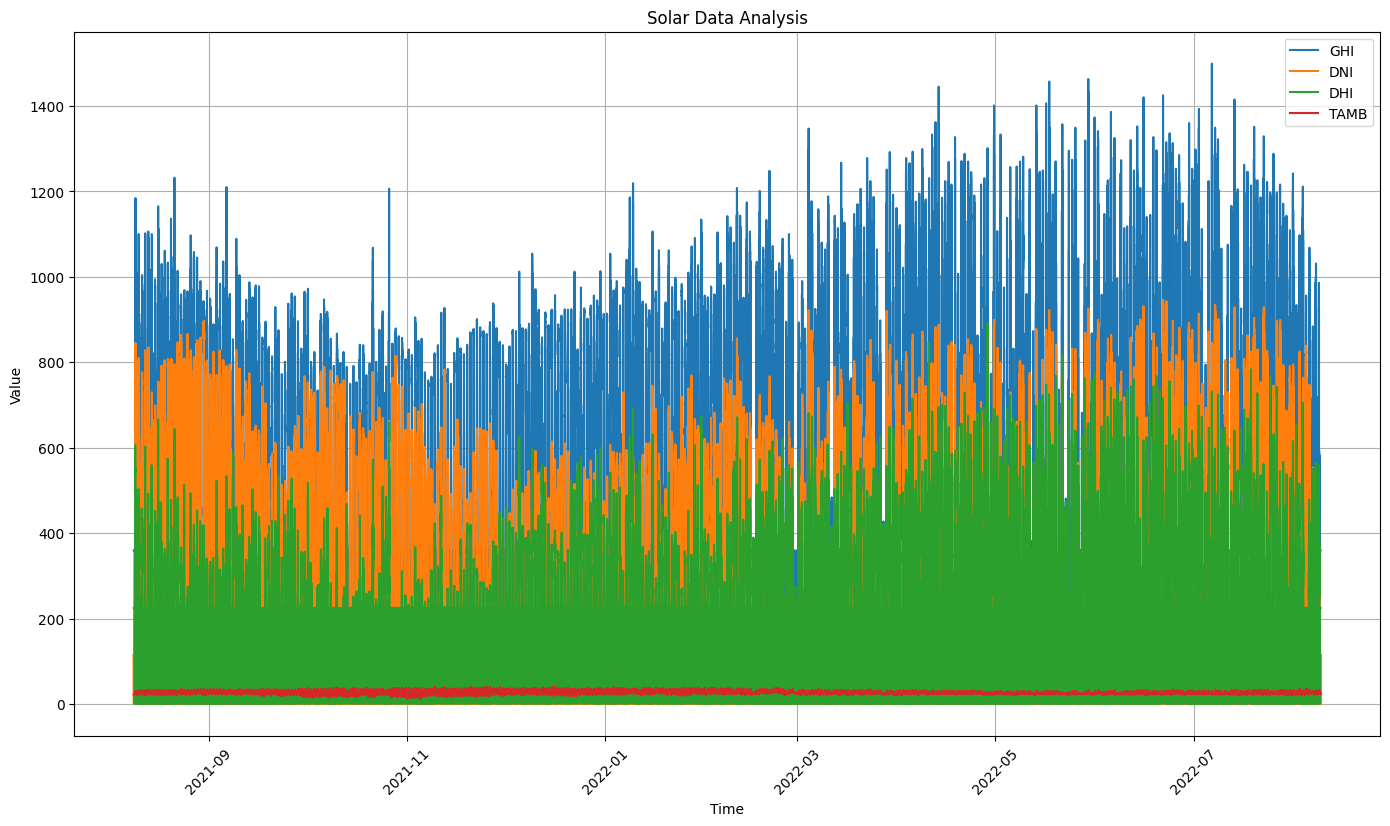


Basic statistics of the main parameters:
                 GHI            DNI            DHI           Tamb
count  525600.000000  525600.000000  525600.000000  525600.000000
mean      383.017951     174.952927     228.914088      26.319394
std       217.653053     193.599354     105.439689       4.398605
min         0.000000       0.000000       0.000000      12.300000
25%       356.700000     115.300000     225.000000      23.100000
50%       359.500000     115.300000     225.000000      25.300000
75%       362.400000     115.300000     225.000000      29.400000
max      1499.000000     946.000000     892.000000      39.900000


In [42]:
df['Timestamp'] = pd.date_range(start='2021-08-09', periods=len(df), freq='1min')

# 3. Set Timestamp as index
df.set_index('Timestamp', inplace=True)

# 4. Create the plot
plt.figure(figsize=(14, 8))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:  # using lowercase as that's how they appear in your data
    plt.plot(df.index, df[col], label=col.upper())

plt.title('Solar Data Analysis')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# 5. Print basic statistics
print("\nBasic statistics of the main parameters:")
print(df[['GHI', 'DNI', 'DHI', 'Tamb']].describe())

Purpose:
To observe how solar irradiance and ambient temperature fluctuate throughout time on a minute-by-minute basis, which helps identify patterns like:

Diurnal solar cycles (day vs night)

Temperature correlation with sunlight

Data anomalies or gaps

Insights:

GHI, DNI, and DHI follow expected daily patterns, peaking around midday.

Ambient temperature (Tamb) rises after sunrise and declines after sunset.

Missing or zero values during night hours are expected.

Any sharp drops or irregular spikes may indicate sensor errors or cloudy conditions.

This plot is a crucial step in understanding the quality and behavior of the raw solar dataset over time.

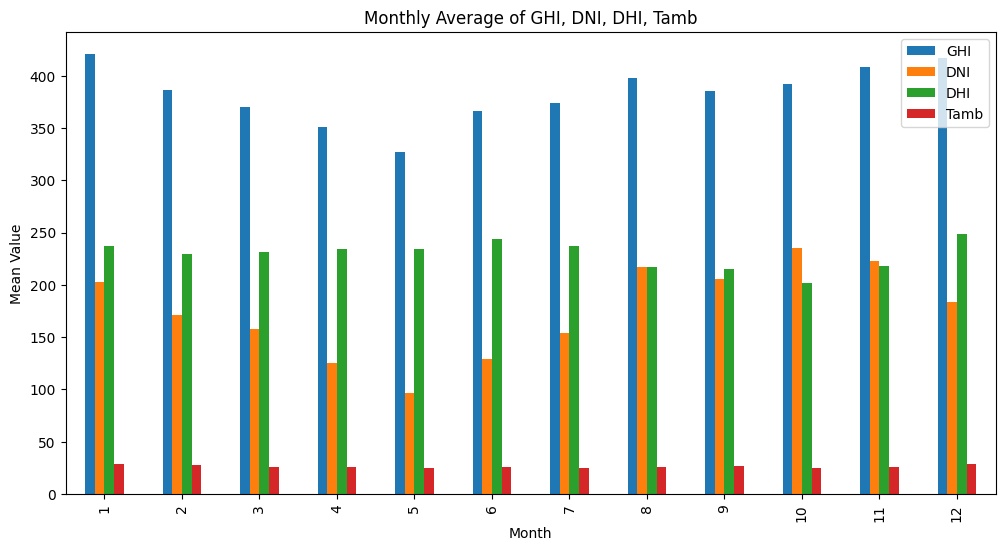

In [43]:
df['Month'] = df.index.month
df['Hour'] = df.index.hour
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
monthly_avg.plot(kind='bar', figsize=(12,6))
plt.title('Monthly Average of GHI, DNI, DHI, Tamb')
plt.ylabel('Mean Value')
plt.show()

Each group of bars corresponds to a specific month, and each color represents one of the four variables. This visualization helps identify seasonal patterns in solar irradiance and temperature.

 Key Observations:
GHI consistently shows the highest values across all months, indicating strong overall solar exposure.

DNI and DHI vary more between months, possibly due to cloud cover or seasonal atmospheric changes.

Tamb (red bars) shows subtle variations, reflecting seasonal temperature changes but staying much lower in magnitude than irradiance.

The months with highest irradiance values may be ideal for solar energy generation planning.

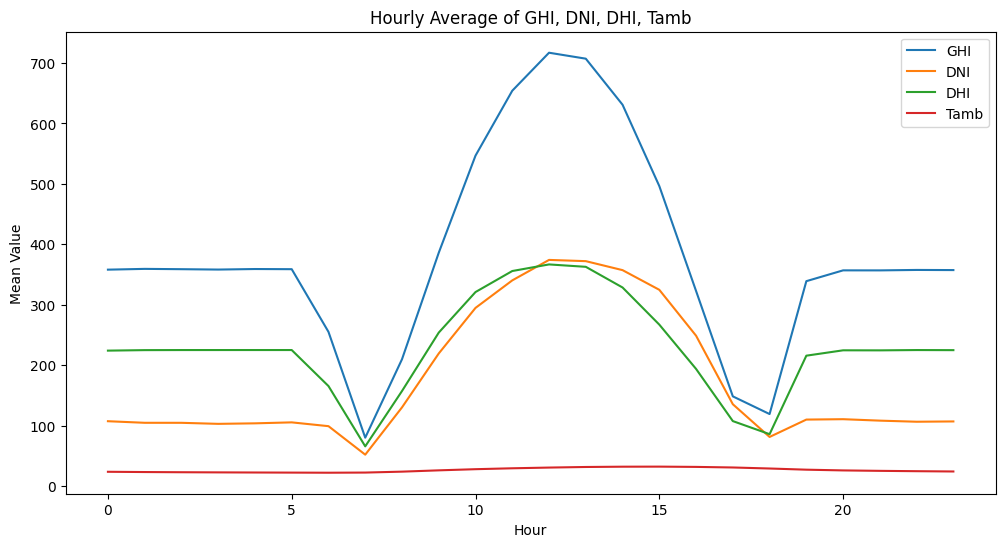

In [44]:
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
hourly_avg.plot(figsize=(12,6))
plt.title('Hourly Average of GHI, DNI, DHI, Tamb')
plt.ylabel('Mean Value')
plt.show()

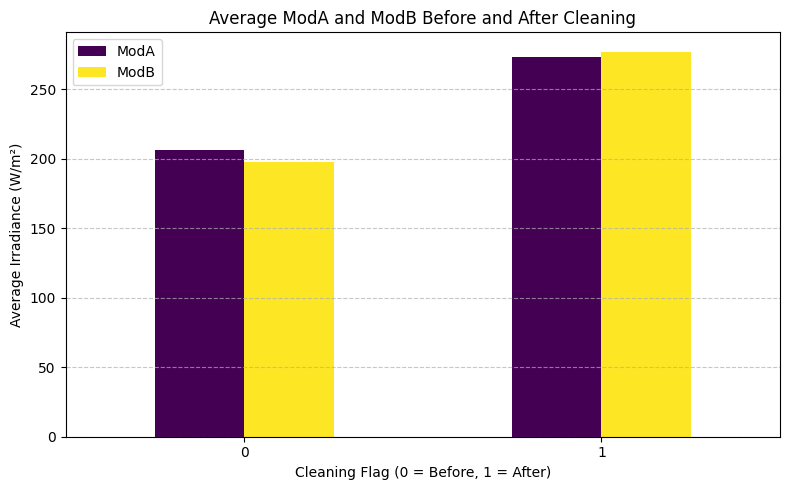

In [45]:
avg_mods = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plot
avg_mods.plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title('Average ModA and ModB Before and After Cleaning')
plt.ylabel('Average Irradiance (W/m²)')
plt.xlabel('Cleaning Flag (0 = Before, 1 = After)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 Effect of Cleaning on Irradiance Sensors (ModA & ModB)
This bar chart illustrates the average irradiance readings from two sensors — ModA and ModB — before and after cleaning.

Cleaning flag:

0 = Before cleaning

1 = After cleaning

What the chart shows:
Irradiance readings increase after cleaning, indicating that dust, dirt, or other obstructions were affecting the sensors.

Both ModA and ModB show similar patterns, reinforcing the reliability of the trend.

Why this matters:
Regular cleaning significantly improves sensor accuracy and overall data quality.

This is especially critical for solar energy systems, where clean sensors ensure proper monitoring and control.

Insight:
 it may be cost-effective to schedule maintenance more frequently.

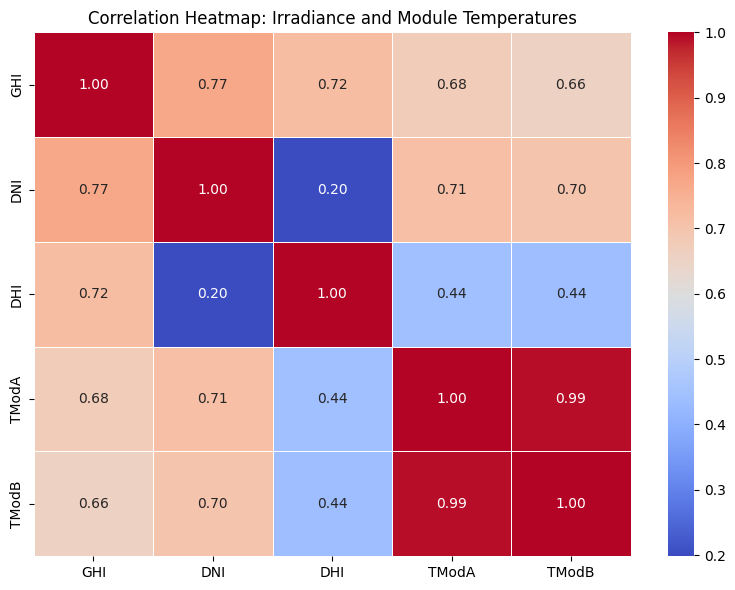

In [30]:
cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Irradiance and Module Temperatures')
plt.tight_layout()
plt.show()

Key Insights:
TModA and TModB are very strongly correlated with each other (0.98) — consistent thermal behavior between both modules.

Both TModA and TModB show:

Strong correlation with GHI and DNI (0.66 and 0.70) individually

Lower correlation with DHI 

GHI has strong correlation with both DHI AND DNI

DHI and DNI have almost no correlation (0.2), as expected — diffuse and direct irradiance vary independently.

Interpretation:
Module temperatures are mainly driven by total solar energy received (GHI), with minor influence from the type (DNI vs. DHI).

This helps in understanding performance limits and heat management strategies for PV modules.



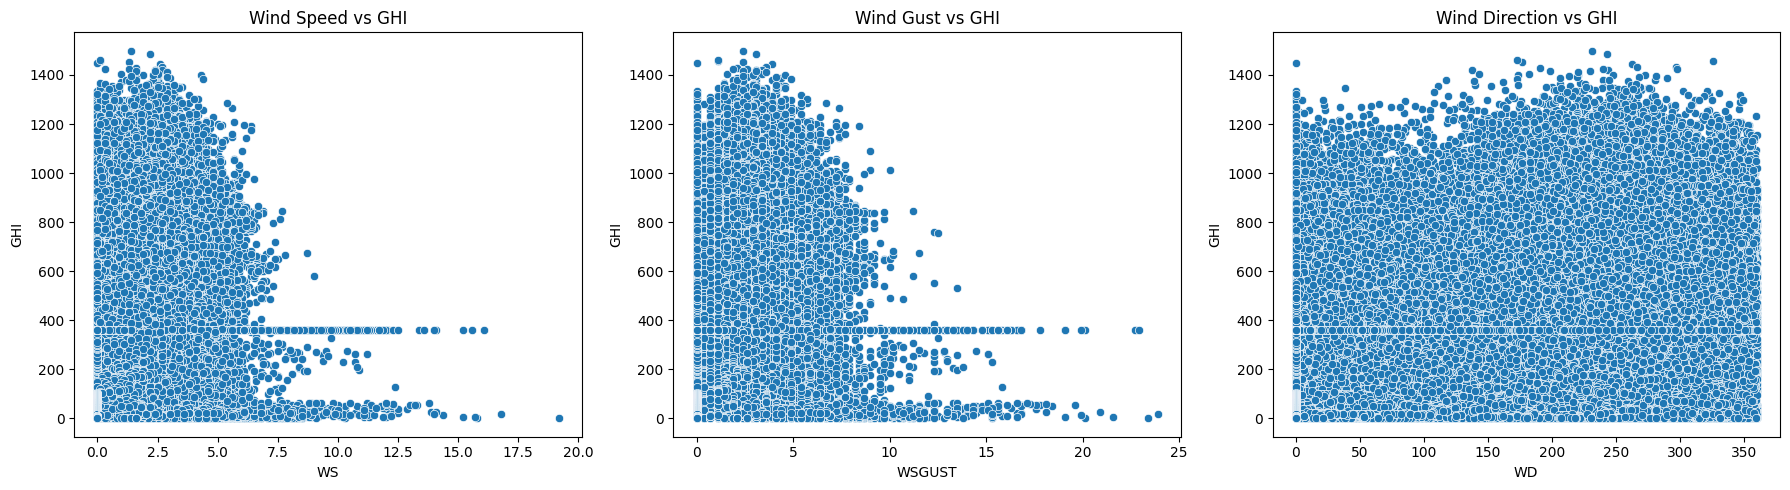

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df, x='WS', y='GHI', ax=axs[0])
axs[0].set_title('Wind Speed vs GHI')

sns.scatterplot(data=df, x='WSgust', y='GHI', ax=axs[1])
axs[1].set_title('Wind Gust vs GHI')

sns.scatterplot(data=df, x='WD', y='GHI', ax=axs[2])
axs[2].set_title('Wind Direction vs GHI')

for ax in axs:
    ax.set_xlabel(ax.get_xlabel().upper())
    ax.set_ylabel('GHI')

plt.tight_layout()
plt.show()

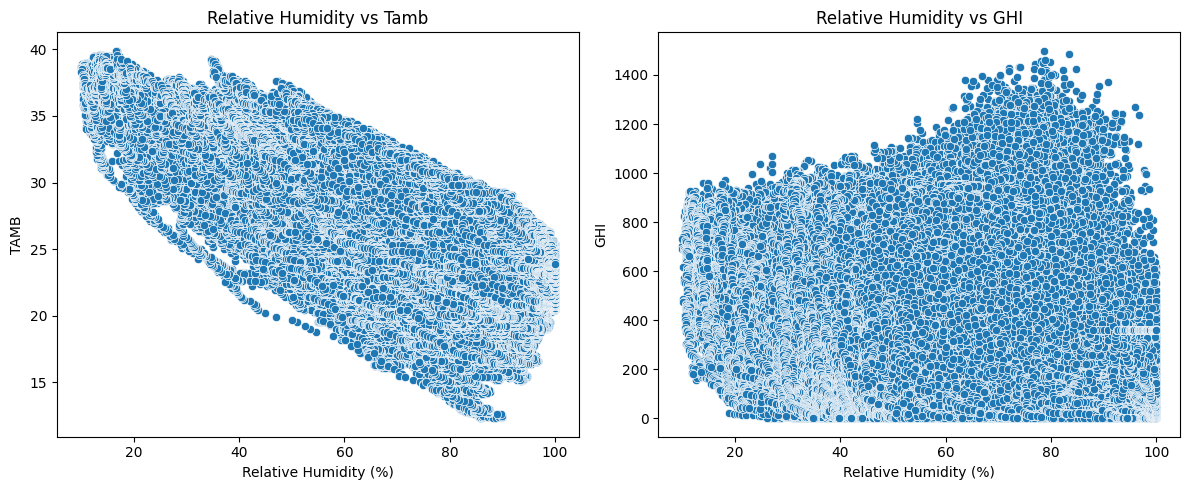

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=df, x='RH', y='Tamb', ax=axs[0])
axs[0].set_title('Relative Humidity vs Tamb')

sns.scatterplot(data=df, x='RH', y='GHI', ax=axs[1])
axs[1].set_title('Relative Humidity vs GHI')

for ax in axs:
    ax.set_xlabel('Relative Humidity (%)')
    ax.set_ylabel(ax.get_ylabel().upper())

plt.tight_layout()
plt.show()

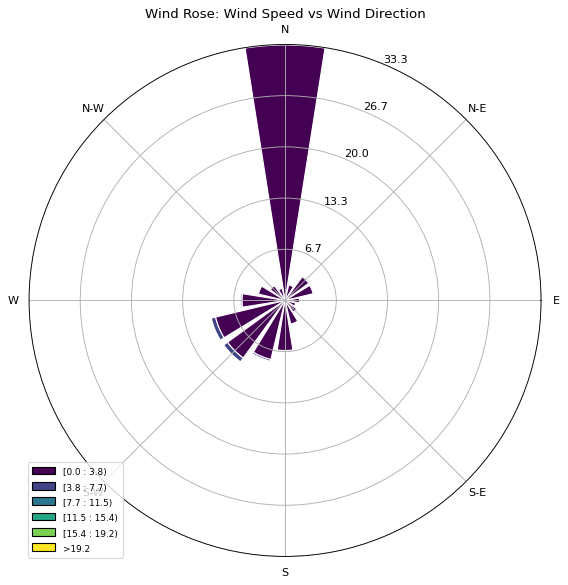

In [33]:
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose: Wind Speed vs Wind Direction')
plt.show()

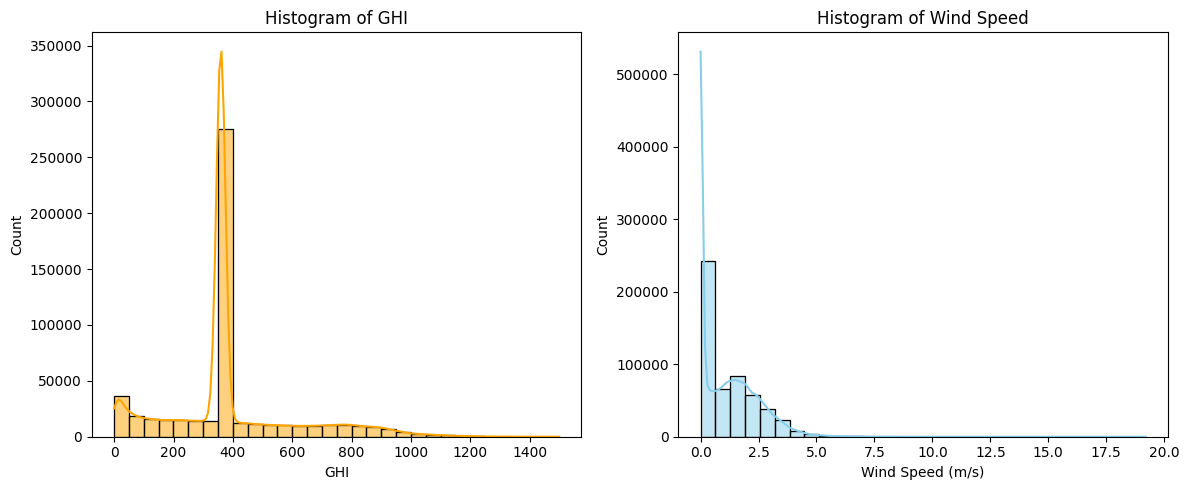

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['GHI'], bins=30, kde=True, ax=axs[0], color='orange')
axs[0].set_title('Histogram of GHI')
axs[0].set_xlabel('GHI')

sns.histplot(df['WS'], bins=30, kde=True, ax=axs[1], color='skyblue')
axs[1].set_title('Histogram of Wind Speed')
axs[1].set_xlabel('Wind Speed (m/s)')

plt.tight_layout()
plt.show()

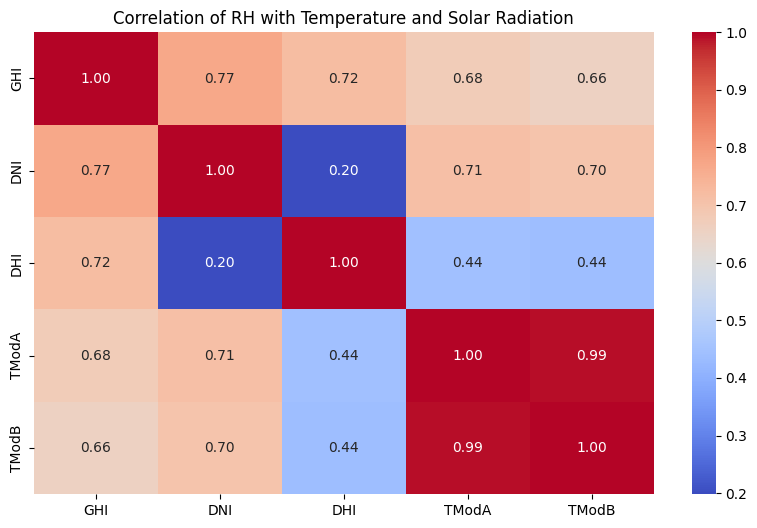

In [35]:
Cols = ['rh', 'tamb', 'tmoda', 'tmodb', 'ghi', 'dni', 'dhi']
correlation_matrix = df[cols].corr()

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of RH with Temperature and Solar Radiation")
plt.show()

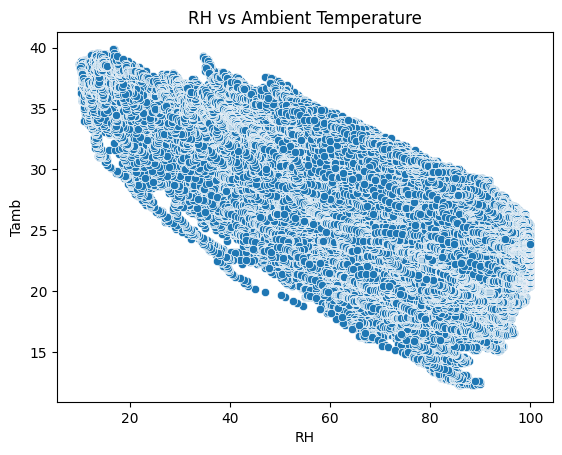

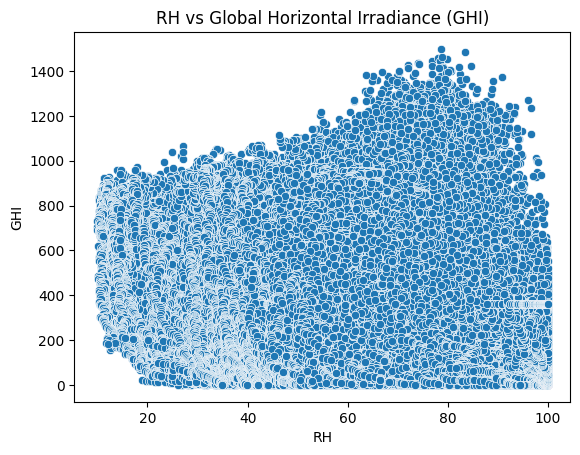

In [ ]:
# RH vs Tamb
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('RH vs Ambient Temperature')
plt.show()

# RH vs GHI
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('RH vs Global Horizontal Irradiance (GHI)')
plt.show()


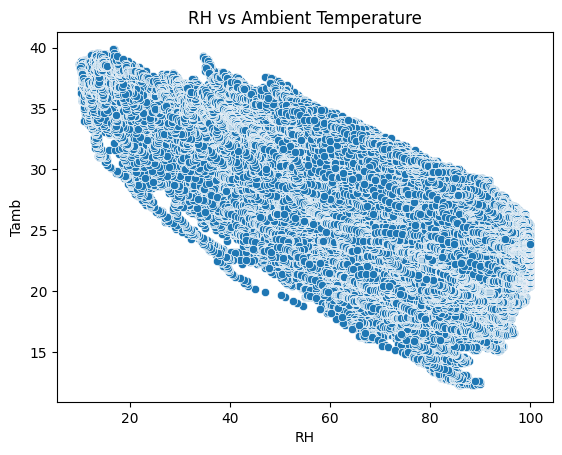

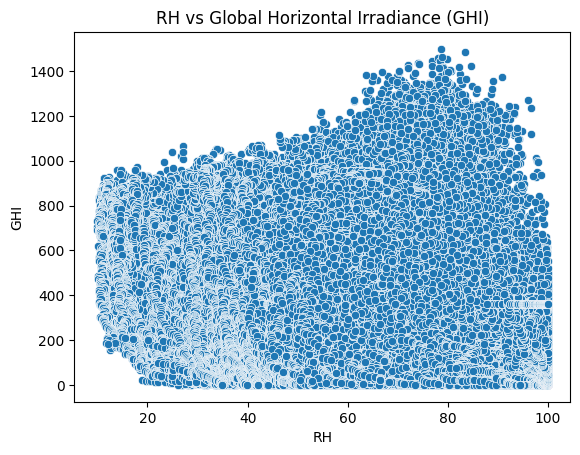

In [38]:
# RH vs Tamb
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('RH vs Ambient Temperature')
plt.show()

# RH vs GHI
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('RH vs Global Horizontal Irradiance (GHI)')
plt.show()


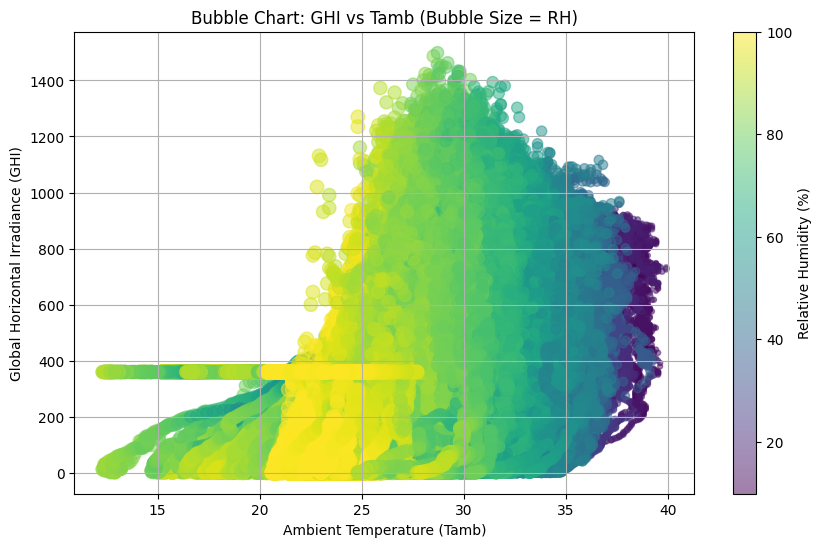

In [40]:
# Bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.5, c=df['RH'], cmap='viridis')
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title('Bubble Chart: GHI vs Tamb (Bubble Size = RH)')
plt.colorbar(label='Relative Humidity (%)')
plt.grid(True)
plt.show()